# Some Text

In [54]:
import pandas as pd
import numpy as np
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

# Iris dataset

Text(0.5, 1.0, 'PCA of IRIS dataset')

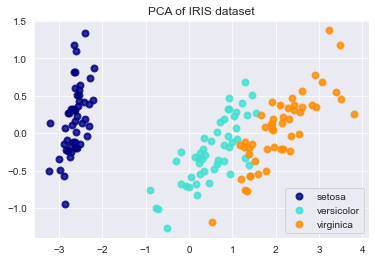

In [55]:
# taken from sklearn docu:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

Decision Tree on Iris Data

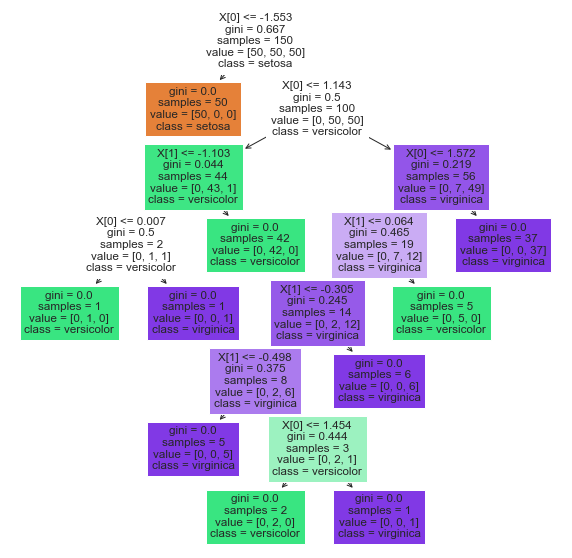

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier().fit(X_r, y)
plt.figure(figsize=(10, 10))

plot = tree.plot_tree(dt, filled=True, class_names=target_names)
plt.show()


set the dataset you want to use

In [57]:
# dataset_id = "40978"  # 2 classes, ~3k features
# dataset_id = "3"  # 2 classes, 73 features
dataset_id = "1486"  # 2 classes, 73 features

## Plot PCA Features against  target


X shape: (34465, 174)
target classes: 
1    24621
0     9844
Name: y, dtype: int64


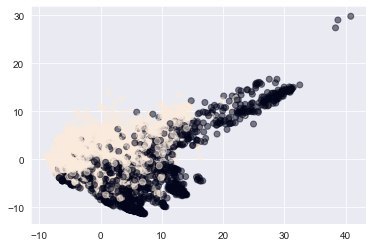

In [58]:
# load data
df_pca_test = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_TEST_CLEAN_PCA_FILE_NAME))
X = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, X_CLEAN_FILE_NAME))
y = pd.read_feather(DATASETS_FOLDER_PATH.joinpath(dataset_id, Y_FILE_NAME))["y"]

#
print(f"X shape: {X.shape}")
print(f"target classes: \n{y.value_counts()}")

# split according to the split from training
_, _, _, y_test = train_test_split(X, y, train_size=TRAIN_TEST_SPLIT_TRAIN_SIZE, random_state=RANDOM_STATE)

# reset index
y_test.reset_index(drop=True, inplace=True)

# concat
df_pca_test["y"] = y_test.reset_index(drop=True)

# plot
n_head = 10000000
plot_x = df_pca_test["pca_0"].head(n_head)
plot_y = df_pca_test["pca_1"].head(n_head)
plot_c = df_pca_test["y"].head(n_head)

plt.scatter(x=plot_x, y=plot_y, c=plot_c, alpha=0.5)
#plt.xlim([-5, 5])
plt.show()